In [2]:
__author__ = "NehaAVarshney"
__email__ = "varshney.n@husky.neu.edu"

<img src="http://cliparts.co/cliparts/8cx/npj/8cxnpjnji.gif"/>

## Table of Contents
### The Problem Data Overview
- [Why is This Data About?](#problem)

### Data Quality Check(EDA -1)
- [Simple Inspection of Data](#datacleaning)

### Descriptive Statistics(EDA -2)
- [Summary Statistics, Turnover Rate, Size of Data](#descriptive_statistics)


###  Exploring The Data
- [ What is the most common reason for calling 911?](#question_1_a)

- [ Display these results graphically](#question_1_b)

###  Visualizations and Mislabelling
- [ Creating a graph of the 911 calls using the 'Latitude' and 'Longitude'(differentiate call type using colors)](#question_2_a)

- [ Are there any Data Points that look mislabeled?](#question_2_b)


###  K-Means Algorithm Implementation
- [ If we were to use only 'Latitude' and 'Longitude', could we make an intelligent decision as to why a resident dialed 911? (In other words, if we take off the labels - can we still determine which category a 911 call would most likely fall into?) ](#question_3_a)

- [ Does the algorithm chosen utilize Euclidean distance? Should we be concerned that 'Latitude' and 'Longitude' are not necessarily Euclidean?](#question_3_b)

- [Display the results of your algorithm, along with the associated code ](#question_3_c)

- [Display the number of correct categorizations](#question_3_d)

- [ What insight can we extract from this analysis?](#question_3_e)


<a id='problem'></a>
# The Problem Data Overview
In this data set, the city of Seattle only receives 911 calls for four reasons 
- _Latte Spills_ i.e a hot latte spills all over your lap 
- _Beavers Attack_ i.e unsuspecting passersbys 
- _Seal Attacks_ 
- _Marshawn Lynch Sightings_ i.e people get very excited and choose to call 911 for some reason 
- **More Insight is shared in Answers of the Questions Section**


# Import Packages
***

In [3]:
# Importing the neccessary modules for data manipulation and visual representation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

# import plotly.plotly as py

# Read the Data

In [4]:
incident_calls_df= pd.read_excel("rev data for test.xlsx")

In [5]:
# Examining the dataset
print ("Contains Incident Type with respect to loctations for total incidents : " + str(len(incident_calls_df)))
incident_calls_df.head()

Contains Incident Type with respect to loctations for total incidents : 1514


,Type,Latitude,Longitude,Report Location
0,Beaver Accident,47.6992,-122.2167,"(47.6291923608656, -122.186728398282)"
1,Beaver Accident,47.6977,-122.2164,"(47.5576821104334, -122.156421437319)"
2,Beaver Accident,47.6967,-122.2131,"(47.6167258135906, -122.173139389518)"
3,Beaver Accident,47.6971,-122.2178,"(47.5370517340417, -122.197755316941)"
4,Beaver Accident,47.6925,-122.2127,"(47.6124577512516, -122.14272010056)"


<a id='datacleaning'></a>
# Data Quality Check
***

There are no null values in this data set, but if there is null value: we should impute it. Otherwise, it will impact the result of our analysis.

In [6]:
# checking to see if there are any missing values in our data set
incident_calls_df.isnull().any()

Type               False
Latitude           False
Longitude          False
Report Location    False
dtype: bool

This summarize the information of dtype of index and column, MAKING IT FEASIBLE FOR FEATURE ENGINEERING non null values and memory usage.

In [7]:
incident_calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1514 entries, 0 to 1513
Data columns (total 4 columns):
Type               1514 non-null object
Latitude           1514 non-null float64
Longitude          1514 non-null float64
Report Location    1514 non-null object
dtypes: float64(2), object(2)
memory usage: 47.4+ KB


Renaming the features to make the code more informative

In [8]:
incident_calls_df = incident_calls_df.rename(columns={'Type': 'Incident_Type',
                                    'Latitude':'Incident_Latitude',
                                    'Longitude':'Incident_Longitude',
                                     'Report Location': 'Report_Station_Location'
                                   })

incident_calls_df.head(3)

,Incident_Type,Incident_Latitude,Incident_Longitude,Report_Station_Location
0,Beaver Accident,47.6992,-122.2167,"(47.6291923608656, -122.186728398282)"
1,Beaver Accident,47.6977,-122.2164,"(47.5576821104334, -122.156421437319)"
2,Beaver Accident,47.6967,-122.2131,"(47.6167258135906, -122.173139389518)"


## Feature Engineering

Adding a new feature:
- [Aggregating the latitude and longitude as Incident_Location]


In [9]:
incident_calls_df["Incident_Location"] = "("+incident_calls_df["Incident_Latitude"].map(str)+","+incident_calls_df["Incident_Longitude"].map(str)+")"


In [10]:
incident_calls_df['frequency'] = incident_calls_df['Incident_Location'].map(incident_calls_df['Incident_Location'].value_counts())

In [11]:
incident_calls_df.to_excel("incident_original.xlsx")

In [12]:
incident_calls_df.sort_values(by=['frequency'], ascending=False).head(3)

,Incident_Type,Incident_Latitude,Incident_Longitude,Report_Station_Location,Incident_Location,frequency
1205,Marshawn Lynch Sighting,47.5199,-122.2684,"(47.519853, -122.268364)","(47.5199,-122.2684)",9
1202,Marshawn Lynch Sighting,47.5199,-122.2684,"(47.519853, -122.268364)","(47.5199,-122.2684)",9
1208,Marshawn Lynch Sighting,47.5199,-122.2684,"(47.519853, -122.268364)","(47.5199,-122.2684)",9


<a id='descriptive_statistics'></a>
# Descriptive Statistics
***

## Getting the Description of all the features in our Dataset

Summarizing the descriptive statistics of the Features. 

1) ***Incident_Type*** :

As provided in the problem statement, there are 4 unique types of reasons to call 911 and the heighest occuring number is 508 for a type of reason

2) ***Incident_Longitude and Incident_Latitude***:

I understood the dispersion of the data points around the mean, and got to know that the Longitude and Latitude values are not not much spread out (as Std is ~0.5 and ~0.09)

3) ***Incident_Location and Report_Station_Location***:

I understood that, there are some repetitive locations i.e locations from where call have been made also, the report locations

**_Curious Step_** : to check if the reason and report station for all the calls from the repetitive location is same or not, same for the report station location.

**_Reason to this thought is_** : If the calls are for the same reason, we can definitely segment the location with reason type.
- [Samples for Incident Location, where multiple calls have been made from](#incident_location)

In [13]:
df_column_headers= list(incident_calls_df)

In [14]:
for column1 in df_column_headers:
    print("Description for Feature:  ",column1)
    print(incident_calls_df[str(column1)].describe())
    print("\n")

Description for Feature:   Incident_Type
count                1514
unique                  4
top       Beaver Accident
freq                  508
Name: Incident_Type, dtype: object


Description for Feature:   Incident_Latitude
count    1514.000000
mean       47.618480
std         0.051916
min        47.500200
25%        47.586008
50%        47.608487
75%        47.672450
max        47.732000
Name: Incident_Latitude, dtype: float64


Description for Feature:   Incident_Longitude
count    1514.000000
mean     -122.284465
std         0.089676
min      -122.469940
25%      -122.355300
50%      -122.301850
75%      -122.185650
max      -122.140100
Name: Incident_Longitude, dtype: float64


Description for Feature:   Report_Station_Location
count                         1514
unique                        1468
top       (47.519853, -122.268364)
freq                             9
Name: Report_Station_Location, dtype: object


Description for Feature:   Incident_Location
count                  

## Info() Analysis:
Checking for Inconsistencies in data 

In [15]:
# Checking the type of our features. 
incident_calls_df.dtypes

Incident_Type               object
Incident_Latitude          float64
Incident_Longitude         float64
Report_Station_Location     object
Incident_Location           object
frequency                    int64
dtype: object

In [16]:
#How many incidents are there in the dataset
incident_calls_df.shape

(1514, 6)


## Exploring The Data


<a id='question_1_a'></a>
***What is the most common reason for calling 911?***

Steps Performed:
- Calculated the 911 call count for each reason
- Calculated the rate for each reason i.e (number of samples for each type / total number of samples) 
- i.e What is rate of calling 911 for each reason?

Here, Taking the incident type with maximum number of 911 calls as the most common reason. 

***Answer: _Beaver Spills_ is the most common reason to call 911, with total calls of 508 i.e ~34% of the 911 calls were for Beaver Accident.

In [17]:
total_incidents= len(incident_calls_df)
incident_count = incident_calls_df.Incident_Type.value_counts()
incident_rate = incident_calls_df.Incident_Type.value_counts()/total_incidents

print("Printing the count of reasons, i.e total reports under each reason")
print("\n")
print(incident_count)
print("\n")
print("Normalizing the value count as rate, to get the clear and relative understanding")
print("\n")
print(incident_rate)

Printing the count of reasons, i.e total reports under each reason


Beaver Accident            508
Latte Spills               416
Marshawn Lynch Sighting    324
Seal Attack                266
Name: Incident_Type, dtype: int64


Normalizing the value count as rate, to get the clear and relative understanding


Beaver Accident            0.335535
Latte Spills               0.274769
Marshawn Lynch Sighting    0.214003
Seal Attack                0.175694
Name: Incident_Type, dtype: float64


<a id='question_1_b'></a>
***Display these results graphically***

**_Answer_** I have chosen countplot from seaborn library to display the count of each observations in _categorical bin (Incident Types)_ using bars

_Interpretation from Graph_ : **Breaver Accident** has the highest count of 911 calls. Therefore, being the most common reason for 911 call.

<function matplotlib.pyplot.show(*args, **kw)>

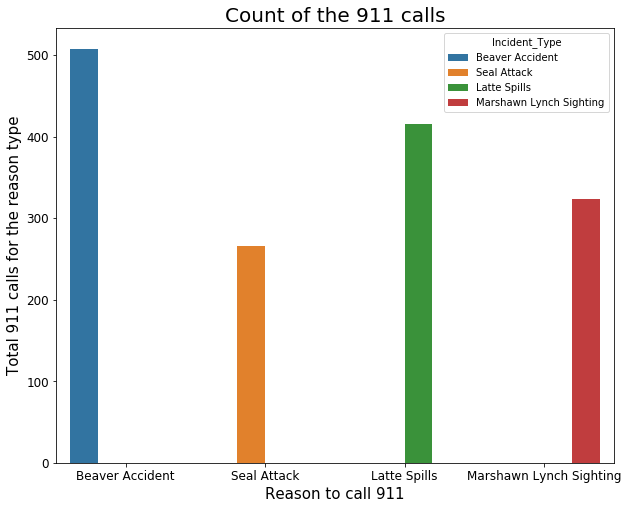

In [18]:
# resizing the plot size
plt.figure(figsize=(10,8))
# Plotting the countplot from seaborn library
ax=sns.countplot(x="Incident_Type", data=incident_calls_df, hue="Incident_Type")


# Setting the title, increasing font size
ax.axes.set_title("Count of the 911 calls",fontsize=20)
# Setting the x and y label i.e name along axis, increasing font size
ax.set_xlabel("Reason to call 911",fontsize=15)
ax.set_ylabel("Total 911 calls for the reason type",fontsize=15)
# Increasing the fontsize of values of each label
ax.tick_params(labelsize=12)

plt.show


# Visualizations and Mislabelling
***

<a id='question_2_a'></a>
**creating a graph of the 911 calls using the 'Latitude' and 'Longitude' (graph type is up to you) (differentiate call type using colors)**

**_Answer ** : Created Scatter Plot of seaborn library to represent the reason of call for each Latitude and Longitude.

Scatter plots show how much one variable is affected by another i.e here, the relation of reason of the calls to latitiude and longitude of the incident.

_This Graph represents that most of the Incident Types are *SEGMENTED* on the Latitude and Longitude, i.e interpreted by the same color data points plotted together for respective latitude and longitude cordinates_

<function matplotlib.pyplot.show(*args, **kw)>

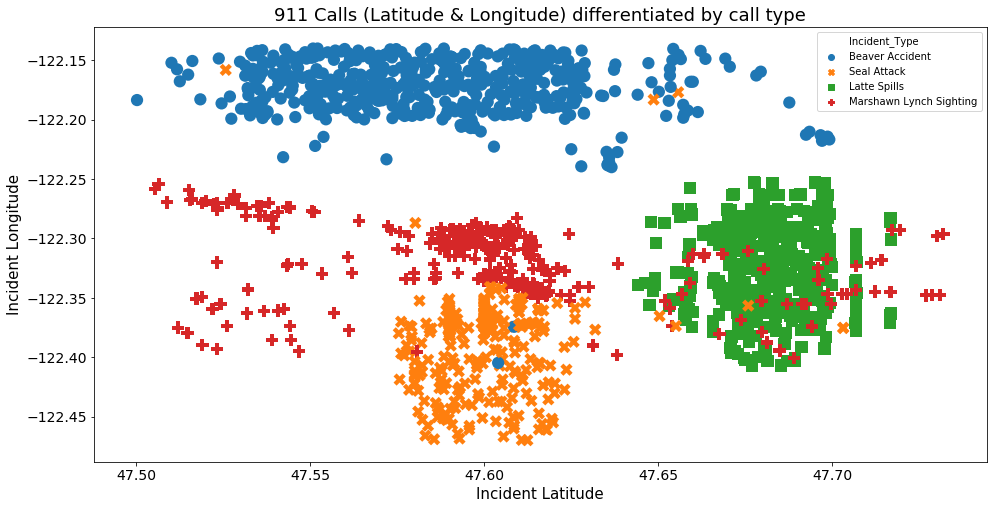

In [19]:
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

cmap=plt.cm.rainbow
# resizing the plot size
plt.figure(figsize=(16,8))

norm = matplot.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)

ax = sns.scatterplot(x="Incident_Latitude", y="Incident_Longitude", 
                     hue="Incident_Type",style="Incident_Type", s= 150,
                     norm = norm, data=incident_calls_df, edgecolor='none')

ax.set_title("911 Calls (Latitude & Longitude) differentiated by call type", fontsize =18)
ax.set_xlabel("Incident Latitude", fontsize = 15)
ax.set_ylabel("Incident Longitude",fontsize=15)

# Increasing the fontsize of values of each label
ax.tick_params(labelsize=14)

plt.show



- [This is analysed by the k means clustering algorithm](#question_3_d)

<a id='question_2_b'></a>
- ***Are there any Data Points that look mislabeled?***

**_Answer_** : Yes, potentially there is some mislabeled data as interepreted by the graph above.

Summary of the above graph:

- There are some Seal Attack data points in the cluster of Beaver Accident, they are potentially mislabeled
- There are few Beaver Accident data pointsin the segment of Seal Attack
- There is a Big Overlap between  Latte Spills and Marshawn Lynch Sighting

_If there is more information about the data, I can do further interpretations regarding these data points_

<a id='question_3'></a>
# K-Means Impelmentation

<a id='question_3_a'></a>

**If we were to use only 'Latitude' and 'Longitude', could we make an intelligent decision as to why a resident dialed 911? (In other words, if we take off the labels - can we still determine which category a 911 call would most likely fall into?)**

Yes, if we were to use only 'Latitude' and 'Longitude', we could make an intelligent decision as to why a resident dialed 911. 

The segmentation of call type as seen in the question 2.A, clearly indicates that latitude and longitude can be used to to decide on the reason of the call.

For example, I am a 911 responder, if I know that calls from location A are due to beaver accident. 
Now, I got a new call which is from the next building of location A. It will be very probable that this call is for beaver accident too.

Also, in the analysis it is seen that:
In case when, multiple calls are made from one location, they have reported the same reason. 
Therefore, if we take off the labels - can we still determine which category a 911 call would most likely fall into.


**Algorithm** : **_K-Means Clustering_**

**Reason being, The Variance(spread of information) of a reason of the call is mostly retained in a cluster, i.e in a segment** 

**Description** : **_It can be used as algorithm for Summarization of data, dividing a group of data points into clusters, where each point in the cluster is similar to each other and dissimilar to data points from other clusters._**

**Reason To Choosing It** : 
- We can detect the area with multiple calls as a proxy of incidents
- We can infer the Hot Spots of the Incident (Reason)
- This will be a good sign as we can infer the probable location of the specific attack
- Will get to know the overall Dense Area between all the reasons of calls
- Also, in the below analysis, I found out that there are locations from where reason of same type were reported many times

<a id='incident_location'></a>
#### Analysing the reason, in case of multiple calls from same location i.e location as a proxy of attack(reason)

**Note:** The below functions are just the sample of the idea of how this can be achieved. _They can be simplified further!!_

Summarizing the below part of analysis:

It is seen in the obtained samples(via code snipped below) that:
- There are 14 locations from where, multiple calls were made to report
- But, the many calls from the same location were placed to report the same reason each time, as seen below.
- Therefore, we can apply segementation(clustering) to intelligently retrieve the reason of call from seeing the location
- To quantifiably convert this analysis into result, I will implement K-means clustering

In [20]:
# Object Oriented Code Structure, increasing modularity of the code

#Function to get the list of locations with more than one call
def get_list_incident_location(list_incident):
    len_incident=len(list_incident)
    list_more_reports=[]
   
    for j in range(0,len_incident-4):
        if(j%2!=0):
            list_more_reports.append(list_incident[j])
    return list_more_reports

# Function to print the samples of the above locations.
#Reason? To check the integrity of calls made from one location

# df['frequency'] = df['county'].map(df['county'].value_counts())

def print_samples_incident(l1):
    for j in l1:
        print("\n")
        print("The value for reason(incident) location", j)
        print("\n")
        print(incident_calls_df.loc[incident_calls_df['Incident_Location'] == j])

        print("---------------------------------------------------")



In [21]:
# getting the count for each incident location 
df_Incident=incident_calls_df.groupby('Incident_Location').Incident_Location.count()

#Getting the list of the incident locations, where the count is > 1i.e have been repeated
# the output was the list of list, so working with data modelling



list1 = [df_Incident[df_Incident>1]][0]


list1= str(list1).split()
# print(list1)

list_incident_location= get_list_incident_location(list1)

print("Number of locations with multiple calls is: ", len(list_incident_location))

Number of locations with multiple calls is:  14


In [22]:
print_samples_incident(list_incident_location)



The value for reason(incident) location (47.5199,-122.2684)


                Incident_Type  Incident_Latitude  Incident_Longitude  \
1200  Marshawn Lynch Sighting            47.5199           -122.2684   
1201  Marshawn Lynch Sighting            47.5199           -122.2684   
1202  Marshawn Lynch Sighting            47.5199           -122.2684   
1203  Marshawn Lynch Sighting            47.5199           -122.2684   
1204  Marshawn Lynch Sighting            47.5199           -122.2684   
1205  Marshawn Lynch Sighting            47.5199           -122.2684   
1206  Marshawn Lynch Sighting            47.5199           -122.2684   
1207  Marshawn Lynch Sighting            47.5199           -122.2684   
1208  Marshawn Lynch Sighting            47.5199           -122.2684   

       Report_Station_Location    Incident_Location  frequency  
1200  (47.519853, -122.268364)  (47.5199,-122.2684)          9  
1201  (47.519853, -122.268364)  (47.5199,-122.2684)          9  
1202  (47.519853, -1

<a id='question_3_b'></a>
**Does the algorithm chosen utilize Euclidean distance? Should we be concerned that 'Latitude' and 'Longitude' are not necessarily Euclidean?**

**Answer**: Yes the algorithm chosen i.e K-MEANS utilizes the Euclidean Distance. 

_Why Distance matters in K-Means Algorithm_: Distance measures how similar two elements are, thus influencing the shape of the clusters.

k-means generates clusters based on the Euclidean distance between points — meaning the straight-line distance between two pins in the map.

But as we know, the Earth isn’t flat so this approximation will affect the clusters being generated


Therefore, **Yes we should be concerned that 'Latitude' and 'Longitude' are not Euclidean.**

Instead, we should be using Geographical (spatial) distance i.e the distance measured along the surface of the earth i.e calculating lengths of the shortest curve between two points along the surface of the Earth.

Hierarchical clustering, PAM, CLARA, and DBSCAN are the popular examples of using spatial distances.

<a id='question_3_c'></a>

 **displaing the results of algorithm, along with the associated code**

##### Import Necessary Libraries

In [23]:
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

##### Number of Clusters?
The number of clusters, explains “most” of the variance in the data, and choose it as the optimum value of k i.e clusters

Here, _Taking cluster size as 4, as there are 4 types of reasons._ 

In the situation when number of types or segments are not provided, we apply the elblow method to calculate the optimum number of clusteres i.e the Optimum value of K.

In [24]:
# from sklearn.cluster import KMeans # Importing KMeans
kmeans_1 = KMeans(n_clusters=4)
# Using fit_predict to cluster the dataset
df_coord = incident_calls_df[['Incident_Longitude','Incident_Latitude','Incident_Type']]
# predictions = kmeans_1.fit_predict(X)   

In [25]:
df_coord.head()

,Incident_Longitude,Incident_Latitude,Incident_Type
0,-122.2167,47.6992,Beaver Accident
1,-122.2164,47.6977,Beaver Accident
2,-122.2131,47.6967,Beaver Accident
3,-122.2178,47.6971,Beaver Accident
4,-122.2127,47.6925,Beaver Accident


In [26]:
from sklearn.cluster import KMeans # Importing KMeans
# Creating an instance of KMeans with 4 clusters
kmeans_1 = KMeans(n_clusters=4)
# Using fit_predict to cluster the dataset
X = df_coord[['Incident_Longitude','Incident_Latitude']].values
predictions = kmeans_1.fit_predict(X)

In [27]:
clustered = pd.concat([df_coord.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)

In [28]:
clustered.drop('index', axis=1, inplace=True)

In [29]:
conditions = [
    clustered['Cluster'] == 0, 
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    ]
choices = ['Beaver Accident','Latte Spills', 'Marshawn Lynch Sighting', 'Seal Attack' ]
clustered['Reason Type'] = np.select(conditions, choices, default='black')

In [30]:
clustered.sort_values(by=['Cluster']).head(2)

,Incident_Longitude,Incident_Latitude,Incident_Type,Cluster,Reason Type
0,-122.2167,47.6992,Beaver Accident,0,Beaver Accident
657,-122.3288,47.6551,Latte Spills,0,Beaver Accident


In [31]:
clustered[clustered['Cluster']==2].head(2)

,Incident_Longitude,Incident_Latitude,Incident_Type,Cluster,Reason Type
11,-122.240000,47.636600,Beaver Accident,2,Marshawn Lynch Sighting
975,-122.309264,47.592783,Marshawn Lynch Sighting,2,Marshawn Lynch Sighting


In [32]:
print(kmeans_1.inertia_)
# measures how spread out clusters are: lower the better

2.4637602937849774


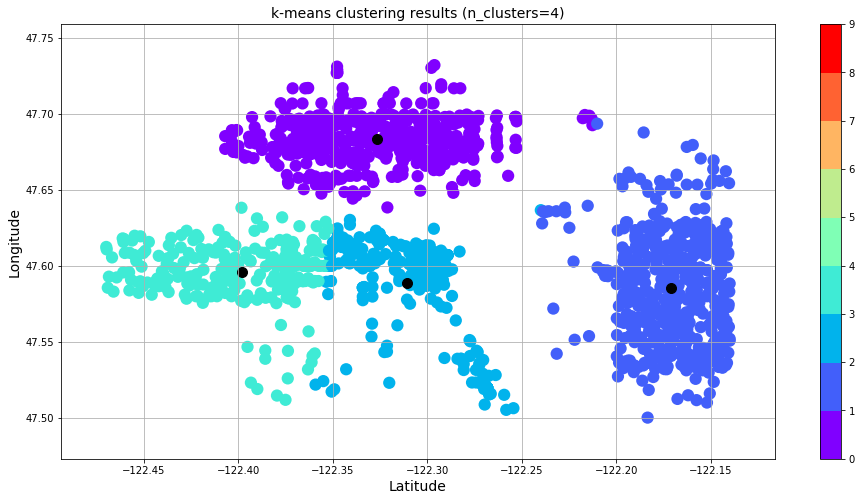

In [33]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplot.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['Incident_Longitude'], clustered['Incident_Latitude'], c=clustered['Cluster'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.colorbar(ticks=np.linspace(0,9,10))
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1);
#plt.xlim(2.28, 2.375)
#plt.ylim(48.84, 48.89)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('k-means clustering results (n_clusters=4)', fontsize=14)
plt.grid()
plt.show()


<a id='question_3_d'></a>

**the number of correct categorizations**

- [Answer 3.D](#question_3_d_answer)

In [34]:
list_category = ["Beaver Accident","Latte Spills","Marshawn Lynch Sighting","Seal Attack"]

for l in list_category:
    print(l)
    b = clustered[clustered["Incident_Type"]==l]
    b_cluster = b["Cluster"]
    print(b_cluster.value_counts())

Beaver Accident
1    499
0      6
3      2
2      1
Name: Cluster, dtype: int64
Latte Spills
0    416
Name: Cluster, dtype: int64
Marshawn Lynch Sighting
2    258
0     47
3     19
Name: Cluster, dtype: int64
Seal Attack
3    240
2     18
0      5
1      3
Name: Cluster, dtype: int64


Wrongly classified values i.e categorised in a different cluster
- [Here is the analysis](#question_3_e)

In [35]:
wrong = 6+2+1+0+47+19+18+5+3

In [36]:
wrong

101

In [37]:
correct = len(clustered) - wrong

In [38]:
print("The Total Correctly categorised values are ",correct)

The Total Correctly categorised values are  1413


<a id='question_3_d_answer'></a>
**3.D.Answer**: **The rightly classified values are: 1413**

How did I analyse this, let's take an example for the Seal Attack

In [39]:
ct_seal= pd.crosstab(clustered["Incident_Type"]=="Seal Attack", clustered["Cluster"])

In [40]:
ct_seal

Cluster,0,1,2,3
Incident_Type,,,,
False,469,499,259,21
True,5,3,18,240


The row with true represents the distribution of the Seal Attack value in the clusters
Incident Type False, means it is not a value for the Seal Attack

- It says that, 240 Seal Attack values are in cluster 3, 26 values are wrongly classified of seal attack in clusters 0,1,2


<a id='question_3_e'></a>
**What insight can we extract from this analysis?**

- Latte Spills is the cluster with least spread out distance

- Marshawn Lynch Sighting is potentially more spread out cluster (15% values in Latte and 5% as Seal Attack)

- This is also supported by the, scatter plot in 2.A, there is a overlap between red and green i.e Latte Spills and Marshawn Lynch Sighting

- To infer with the problem statement, in come cases people called out to 911 due to latte spills but maybe did not close the reason for some reason.Or this maybe a error in dataset. Cross Checking with business person is the best idea here

- Seal Attacks are also some times reported as the Marshawn Lynch Sighting

_***Thank You!***_

_Neha A Varshney_